# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [18]:
# Your code here. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

StudentID = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
Tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]


student_data = pd.DataFrame({'StudentID': StudentID ,'Age': Age ,'Tardies': Tardies})

Draw a dispersion diagram (scatter plot) for the data.

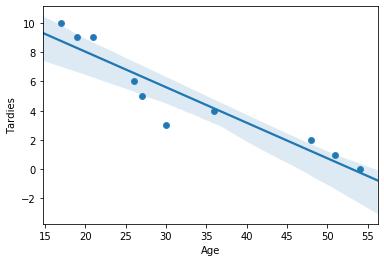

In [21]:
# Your code here.
sns.scatterplot(student_data.Age, student_data.Tardies)
sns.regplot(student_data.Age, student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
#There appears to be a downslope relationship between the student's age and the number of tardies, according to the plot.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [23]:
# Your response here.
corr = student_data.corr()
corr

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

,Age
0,17
1,51
2,27
3,21
4,36
5,48
6,19
7,26
8,54
9,30


In [27]:
# Your response here.
model = LinearRegression()
X = student_data[['Age']]
y = student_data['Tardies']
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plot your regression model on your scatter plot.

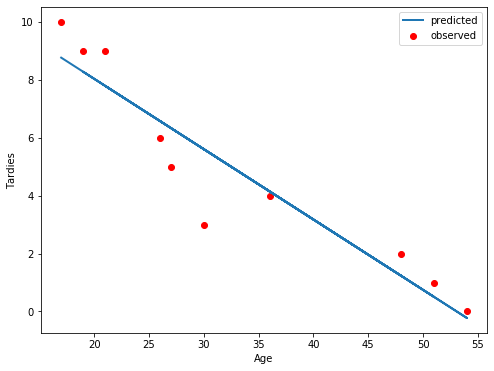

In [36]:
# Your code here.
y_pred = model.predict(X)
y_pred
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.scatter(X, y, color='red', label='observed')
plt.plot(X, y_pred, label='predicted', lw=2)
plt.legend()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [33]:
# Your response here. 
f'Tardies = {model.intercept_} + {model.coef_} * Age'

'Tardies = 12.888803363135768 + [-0.24282077] * Age'

In [ ]:
# This mode tells us that for every year of age, there are -0.243 chances of being tardy.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [39]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [42]:
# Your response here. 
df = vehicles[['Year', 'Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
df.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
# By looking at the last column, there are three features with a high correlation in regards of CO2 Emissions.
# these features are: Fuel Barrels/Year, Fuel Cost/Year, with a positive correlation, and Combined MPG with a negative
# correlation respectively. There appears to be a mild correlation between Cylinders and CO2 Emissions
# With this data, We can build a new model with multiple linear regression.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [43]:
# Your response here. 
model1 = LinearRegression()
X = df[['Fuel Barrels/Year', 'Fuel Cost/Year', 'Cylinders', 'Combined MPG']]
y = df['CO2 Emission Grams/Mile']
model1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
print(model1.coef_, model1.intercept_)


[19.62713308  0.029393    1.04483633 -3.16658852] 131.1563247541785


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [50]:
# a good practice test would be to standarize the values to see what happens with the coefs and intercepts.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
model2 = LinearRegression()
model2.fit(X_std, y)
print(model2.coef_, model2.intercept_)

[ 87.67873237  14.90082639   1.83394252 -16.1886703 ] 475.3163392572124


In [51]:
# Your response here. 
import statsmodels.api as sm
X.tail()

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()


C:\Users\Alvaro Camacho\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 4.470e+05
Date:                     Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                             16:07:14   Log-Likelihood:            -1.5226e+05
No. Observations:                    35952   AIC:                         3.045e+05
Df Residuals:                        35947   BIC:                         3.046e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               131.1563      1.688     77.714      0.000     127.848     134.464
Fuel Barrels/Year    19.6271      0.060    329.809      0.000      19.510      19.744
Fuel Cost/Year        0.0294      0.000     61.102      0.000       0.028       0.030
Cylinders             1.0448      0.080     12.993      0.000       0.887       1.202
Combined MPG         -3.1666      0.043    -73.810      0.000      -3.251      -3.082
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [56]:
# Your code here. 
df = pd.DataFrame({'Number of People Invited': [1,3,4,6,8,9,11,14], 'Number of People who Attend': [1,2,4,4,5,7,8,13]})
df

,Number of People Invited,Number of People who Attend
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

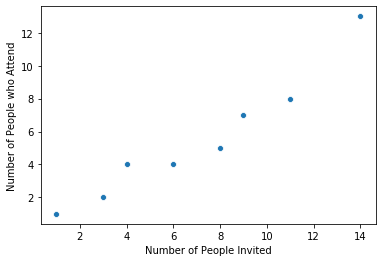

In [57]:
# Your code here.
sns.scatterplot(df['Number of People Invited'], df['Number of People who Attend'])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

[0.84848485] -0.43939393939393945


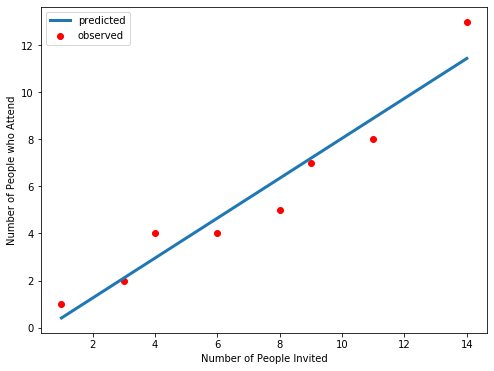

In [66]:
# Your response here. 
# The more people you invite, the likely they are to attend. But, let's fit a model in there:
model3 = LinearRegression()
X = df[['Number of People Invited']]
y = df['Number of People who Attend']
model3.fit(X,y)
y_pred = model3.predict(X)
y_pred
plt.figure(figsize=(8,6))
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People who Attend')
plt.scatter(X, y, color='red', label='observed')
plt.plot(X, y_pred, label='predicted', lw=3)
plt.legend()
print(model3.coef_, model3.intercept_)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

[0.68421053] 0.32330827067669254


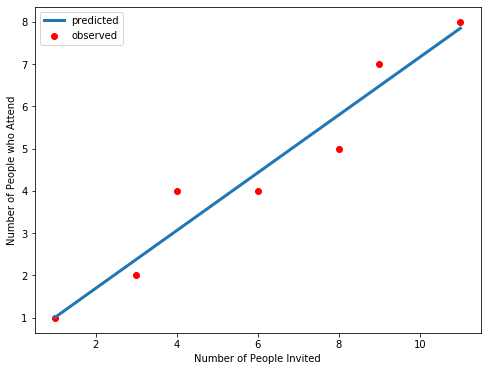

In [67]:
# Your response here. There would be a possivel outlier, which is the last point.
df1 = pd.DataFrame({'Number of People Invited': [1,3,4,6,8,9,11], 'Number of People who Attend': [1,2,4,4,5,7,8]})
model4 = LinearRegression()
X = df1[['Number of People Invited']]
y = df1['Number of People who Attend']
model4.fit(X,y)
y_pred = model4.predict(X)
y_pred
plt.figure(figsize=(8,6))
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People who Attend')
plt.scatter(X, y, color='red', label='observed')
plt.plot(X, y_pred, label='predicted', lw=3)
plt.legend()
print(model4.coef_, model4.intercept_)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# Both the slope and the y-intercept changed, which means, that removing the last point actually affects the result
# of the model.